        Close     HL_PCT  PCT_change    Volume      label  Forecast
0   57.900002   2.590673    0.695656   7033084  56.849998       NaN
1   56.849998   3.342123   -1.643600   4886648  57.700001       NaN
2   57.700001   3.552858    1.495168   3485691  56.849998       NaN
3   56.849998   2.286718   -1.044392   2705187  56.200001       NaN
4   56.200001   4.092534   -0.969161   4263309  57.049999       NaN
5   57.049999   2.541623    1.332149   2676257  56.049999       NaN
6   56.049999   3.033008   -1.752848   2185801  57.349998       NaN
7   57.349998   2.964248    2.046258   1810131  56.349998       NaN
8   56.349998   3.904172   -1.140354   3102093  56.799999       NaN
9   56.799999   3.521127    0.888099   3222000  55.150002       NaN
10  55.150002   4.079782   -2.475680   3750598  51.250000       NaN
11  51.250000  11.414640   -7.071626  16427119  52.750000       NaN
12  52.750000   2.843602   -0.094695   3496333  48.099998       NaN
13  48.099998  12.162159   -9.840675  10222169  

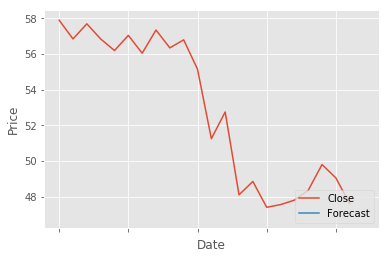

In [4]:
import math
#import Quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')
df = pd.read_csv('input/tv18/TV18BRDCST.csv', header=0,index_col=False);
df = df[['Date',  'Open',  'High',  'Low', 'Close','Volume']]

df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]
forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
print(df)
#last_unix = last_date.timestamp()
one_day = 86400
#next_unix = last_unix + one_day
next_unix = datetime.datetime.now().day + one_day


for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()